# Loading Drug-Target Interaction Datasets

This notebook covers:
- Loading the Davis, KIBA, BindingDB, Metz datasets
- Merging them into a single dataframe
- Filtering based on molecular properties
- Annotating drugs and targets with additional information (InChI keys, DNA sequences, etc.)
- Visualizing distributions, overlaps, and statistics
- Saving the merged dataset as a csv file

Unique drug-target interaction pairs: 396.469
- Unique drugs: 149,962
- Unique targets: 2.047
- Ratio observed: 0.13%

In [1]:
import os

# Set the working directory to the root of the project
os.chdir("/home/robsyc/Desktop/thesis/MB-VAE-DTI")

## Load, merge and filter the DTI datasets

In [2]:
# Load the merged dataset & apply filters
from mb_vae_dti.loading import load_or_create_merged_dataset

df = load_or_create_merged_dataset(
    dataset_names=["DAVIS", "KIBA", "BindingDB_Kd", "BindingDB_Ki", "Metz"], 
    force_reload=True,
    apply_filters=True,
    verbose=True
)
df

19:31:34 - INFO - Old pandas version detected. Patching DataFrame.map to DataFrame.applymap
Found local copy...
Loading...
Done!
To log space...
The original data has been updated!
Found local copy...
Loading...


Creating merged dataset from: DAVIS, KIBA, BindingDB_Kd, BindingDB_Ki, Metz
KIBA dataset will be prioritized during merging
KIBA dataset detected. Reordering to prioritize KIBA values in conflicts.
Loading DAVIS dataset...
Canonicalizing 68 SMILES strings...
Canonicalized 68 SMILES strings
Unique drugs: 68
Unique targets: 379
Unique drug-target pairs: 25772
Ratio observed: 1.0
Loaded DAVIS dataset with 25772 interactions


Loading BindingDB_Kd dataset...


Done!
To log space...
The original data has been updated!


Canonicalizing 9887 SMILES strings...
Canonicalized 9887 SMILES strings
Unique drugs: 9887
Unique targets: 1088
Unique drug-target pairs: 42236
Ratio observed: 0.00393
Found duplicate drug-target pairs in BindingDB_Kd. Keeping pairs with highest affinity.


Found local copy...
Loading...


Loaded BindingDB_Kd dataset with 42229 interactions


Loading BindingDB_Ki dataset...


Done!
To log space...
The original data has been updated!


Canonicalizing 160079 SMILES strings...
Canonicalized 160079 SMILES strings
Unique drugs: 160079
Unique targets: 2420
Unique drug-target pairs: 296685
Ratio observed: 0.00077
Found duplicate drug-target pairs in BindingDB_Ki. Keeping pairs with highest affinity.
Loaded BindingDB_Ki dataset with 296667 interactions


Loading Metz dataset...
Canonicalizing 1423 SMILES strings...


Found local copy...
Loading...


Canonicalized 1423 SMILES strings
Unique drugs: 1423
Unique targets: 170
Unique drug-target pairs: 35259
Ratio observed: 0.14575
Loaded Metz dataset with 35259 interactions


Loading KIBA dataset...


Done!


Canonicalizing 2068 SMILES strings...
Canonicalized 2068 SMILES strings
Unique drugs: 2068
Unique targets: 229
Unique drug-target pairs: 117657
Ratio observed: 0.24845
Loaded KIBA dataset with 117657 interactions


Found 24 conflicting Y values when merging with BindingDB_Kd
Found 234 conflicting Y values when merging with BindingDB_Ki
Found 161 conflicting Y values when merging with Metz
Found 9078 conflicting Y values when merging with KIBA
Merged dataset contains 481978 unique drug-target pairs
Total Y-column merges performed: 35606
Conflicting Y-column merges: 9497 (26.67% of merges)
KIBA dataset values were prioritized in the final merge.
Filtering dataset with 481978 rows...
  - Max heavy atoms: 64
  - Max protein sequence length: 1280
Computing heavy atom counts for 171050 molecules...
Computed heavy atom counts for 171050 molecules
Filtering complete. Rows reduced from 481978 to 447436
Saved dataset to data/processed/merged_BindingDB_Kd_BindingDB_Ki_DAVIS_KIBA_Metz_kiba_priorit

,Drug_SMILES,Target_AA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA
0,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,False,4.999996,NaN,NaN,True,True,False,False,False
1,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,True,8.920819,NaN,NaN,True,False,False,False,False
2,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,True,7.995679,NaN,NaN,True,False,False,False,False
3,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,False,4.999996,NaN,NaN,True,True,False,False,False
4,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,False,4.999996,NaN,NaN,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
481973,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,False,NaN,NaN,10.49794,False,False,False,False,True
481974,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,False,NaN,NaN,10.49794,False,False,False,False,True
481975,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,False,NaN,NaN,10.49794,False,False,False,False,True
481976,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,False,NaN,NaN,10.49794,False,False,False,False,True


## Annotate drugs and targets with additional information

We annotate the drugs (SMILES) and targets (AA sequences) with additional information.
For drugs:
- Canonical SMILES from RDKit.
- InChI key from PubChem/ChEMBL.

For targets:
- Identifiers: UniProt ID, RefSeq ID, Gene name.
- Sequences: Amino acid sequence from Uniprot, DNA sequence from RefSeq.

In [3]:
from mb_vae_dti.loading import annotate_dti

# this runs & caches API calls to PubChem, ChEMBL, Uniprot, BLAST, etc.
# it takes 2-3 days to run on the full dataset (20 mins when cached)
df = annotate_dti(df, verbose=False)

Starting annotation process...
Input dataset contains 447436 drug-target interactions

Step 1: Extracting unique drugs and targets...
Found 162026 unique drugs and 2705 unique targets

Step 2: Adding potential IDs...

Step 3: Annotating drugs...


Annotating drugs: 100%|██████████| 162026/162026 [03:23<00:00, 796.34it/s] 



Step 4: Annotating targets...


Annotating targets:   8%|▊         | 223/2705 [01:52<26:10,  1.58it/s]

Error fetching RefSeq record None: HTTP Error 400: Bad Request


Annotating targets: 100%|██████████| 2705/2705 [12:47<00:00,  3.53it/s]  



Step 5: Filtering for valid drugs and targets...
Found 162026/162026 valid drugs
Found 2047/2705 valid targets

Sample invalid drugs (max 10):
| Drug_SMILES   | Potential_ID   | Drug_InChIKey   | Drug_Valid   |
|---------------|----------------|-----------------|--------------|

Sample invalid targets (max 10):
| Target_AA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [4]:
# print unique drugs and targets, interactions, number of possible interactions and ratio
print(f"Unique drugs: {len(df['Drug_SMILES'].unique())}")
print(f"Unique targets: {len(df['Target_AA'].unique())}")
print(f"Interactions: {len(df)}")
print(f"Number of possible interactions: {len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique())}")
print(f"Ratio: {(len(df) / (len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique()))) * 100}%")
df

Unique drugs: 149962
Unique targets: 2047
Interactions: 396469
Number of possible interactions: 306972214
Ratio: 0.12915468629352883%


,Drug_ID,Drug_InChIKey,Drug_SMILES,Target_ID,Target_UniProt_ID,Target_Gene_name,Target_RefSeq_ID,Target_AA,Target_DNA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA
0,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000001,Q2M2I8,AAK1,NM_014911,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,ATGAAGAAGTTTTTCGACTCCCGGCGAGAGCAGGGCGGCTCTGGCC...,False,4.999996,NaN,NaN,True,True,False,False,False
1,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000002,P00519,ABL1,NM_005157,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,AACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACA...,True,8.920819,NaN,NaN,True,False,False,False,False
3,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000003,Q04771,ACVR1,NM_001105,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,ATGGTAGATGGAGTGATGATTCTTCCTGTGCTTATCATGATTGCTC...,False,4.999996,NaN,NaN,True,True,False,False,False
4,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000004,P36896,ACVR1B,NM_004302,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,ATGGCGGAGTCGGCCGGAGCCTCCTCCTTCTTCCCCCTTGTTGTCC...,False,4.999996,NaN,NaN,True,True,False,False,False
5,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000005,P27037,ACVR2A,NM_001278579,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTG...,ATGGGAGCTGCTGCAAAGTTGGCGTTTGCCGTCTTTCTTATCTCCT...,False,4.999996,NaN,NaN,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481971,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T001711,P41279,MAP3K8,NM_001244134,MEYMSTGSDNKEEIDLLIKHLNVSDVIDIMENLYASEEPAVYEPSL...,ATGGAGTACATGAGCACTGGAAGTGACAATAAAGAAGAGATTGATT...,True,NaN,NaN,13.70206,False,False,False,False,True
481973,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000031,Q13554,CAMK2B,NM_001220,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,ATGGCCACCACGGTGACCTGCACCCGCTTCACCGACGAGTACCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
481975,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000032,Q13557,CAMK2D,NM_001221,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,ATGGCTTCGACCACAACCTGCACCAGGTTCACGGACGAGTATCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
481976,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000280,Q16539,MAPK14,NM_001315,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,ATGTCTCAGGAGAGGCCCACGTTCTACCGGCAGGAGCTGAACAAGA...,False,NaN,NaN,10.49794,False,False,False,False,True


In [5]:
from mb_vae_dti.loading import get_dataset_stats

get_dataset_stats(df)

{'n_interactions': 396469,
 'n_unique_drugs': 149962,
 'n_unique_targets': 2047,
 'avg_drug_smiles_length': 52.68680527355228,
 'avg_target_aa_length': 542.1792145161412,
 'Y_pKd_mean': 5.715478379916169,
 'Y_pKd_std': 1.21219096902048,
 'Y_pKd_min': 1.999999995657055,
 'Y_pKd_max': 10.0,
 'Y_pKi_mean': 6.739502749769591,
 'Y_pKi_std': 1.461059400745257,
 'Y_pKi_min': 1.999999995657055,
 'Y_pKi_max': 10.1,
 'Y_KIBA_mean': 11.728814557922115,
 'Y_KIBA_std': 0.826001505543396,
 'Y_KIBA_min': 0.0,
 'Y_KIBA_max': 17.196910013,
 'in_DAVIS_count': 19244,
 'in_DAVIS_percentage': 4.853847337370639,
 'in_BindingDB_Kd_count': 30727,
 'in_BindingDB_Kd_percentage': 7.750164577810622,
 'in_BindingDB_Ki_count': 258121,
 'in_BindingDB_Ki_percentage': 65.10496407033085,
 'in_Metz_count': 26029,
 'in_Metz_percentage': 6.565204341323029,
 'in_KIBA_count': 89708,
 'in_KIBA_percentage': 22.626737525506407}

## Visualize the merged dataset

We visualize:
- The distribution of interactions across the datasets, showing the various ranges & binary thresholds.
- The statistics key drug and target properties.
- The overlap between source datasets.
- And Lorenz curves illustrating the biased nature of experimental drug-target interaction datasets.

In [6]:
from mb_vae_dti.loading import (
    plot_interaction_distribution,
    plot_dataset_statistics,
    plot_interaction_stats,
    plot_dataset_overlap,
    plot_lorenz_curves,
)

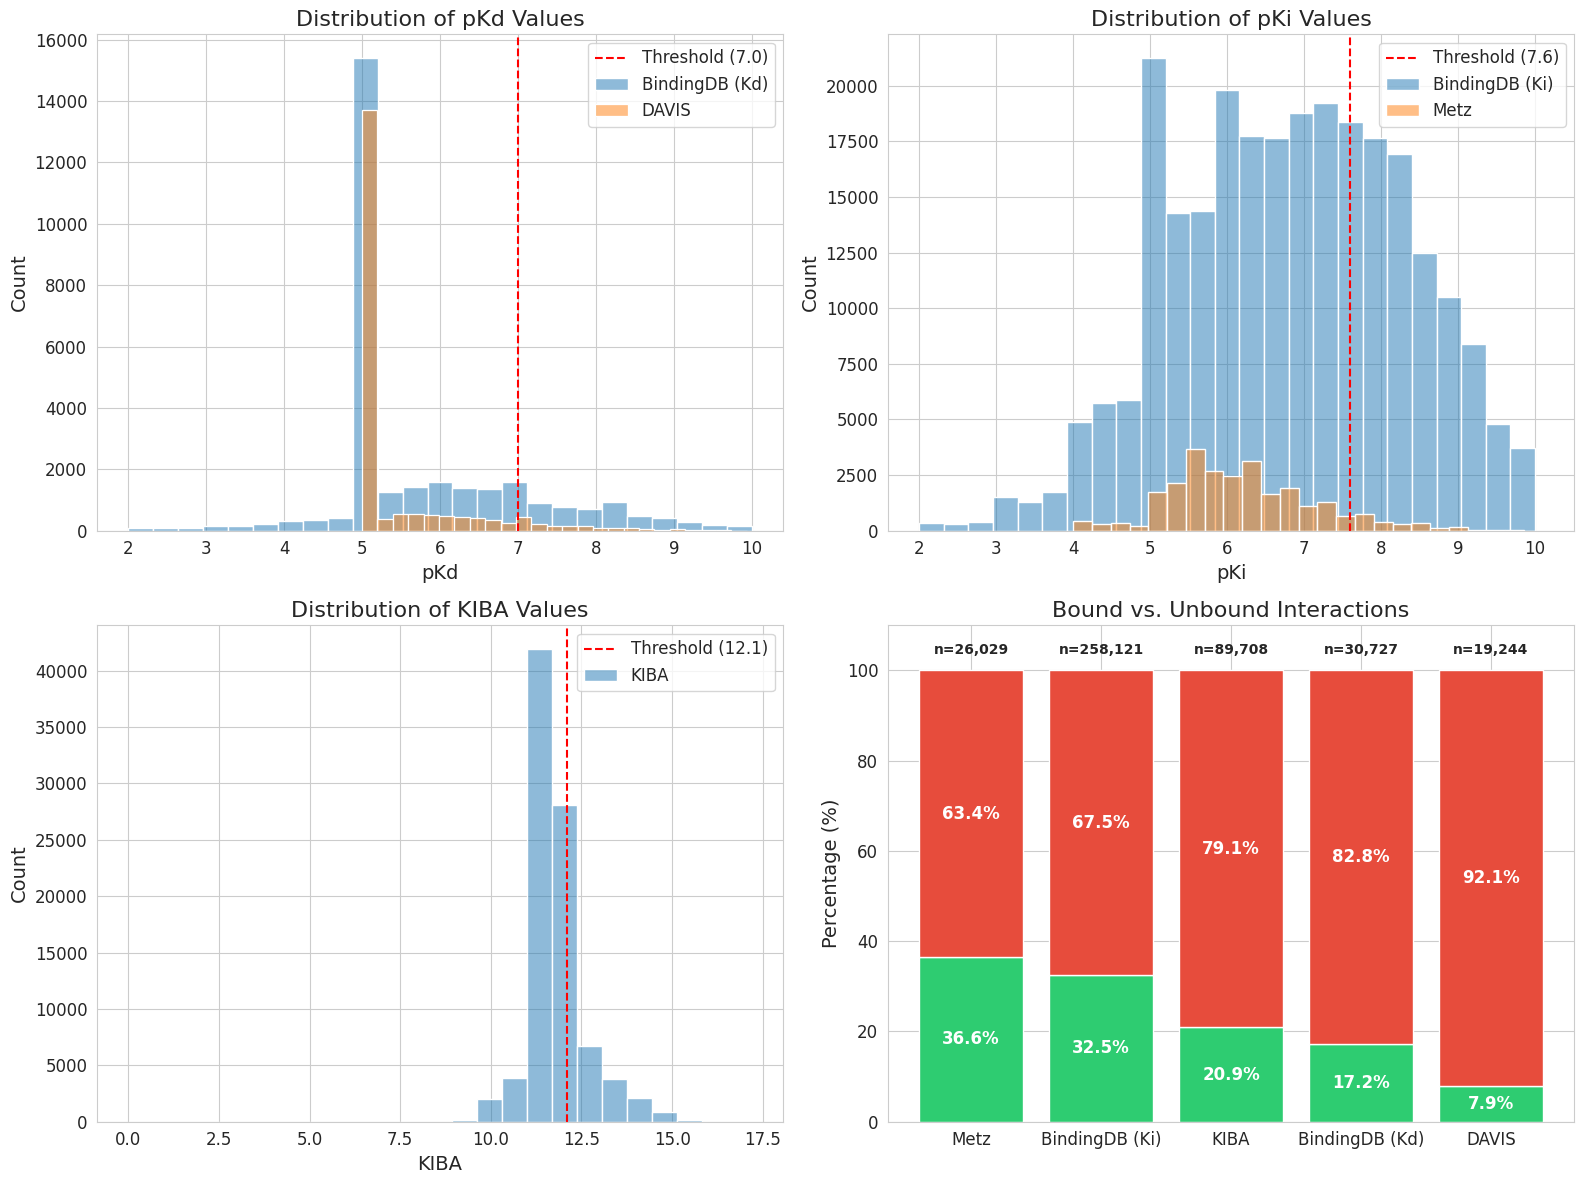

'data/images/interaction_distribution.png'

In [7]:
df_Davis = df[df['in_DAVIS'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKd = df[df['in_BindingDB_Kd'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKi = df[df['in_BindingDB_Ki'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_Metz = df[df['in_Metz'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_KIBA = df[df['in_KIBA'] == True].drop(columns = ['Y_pKd', 'Y_pKi'])

plot_interaction_distribution(
    [df_BDBKd, df_Davis, df_BDBKi, df_Metz, df_KIBA],
    ["BindingDB (Kd)", "DAVIS", "BindingDB (Ki)", "Metz", "KIBA"],
    save_path="data/images/interaction_distribution.png"
)

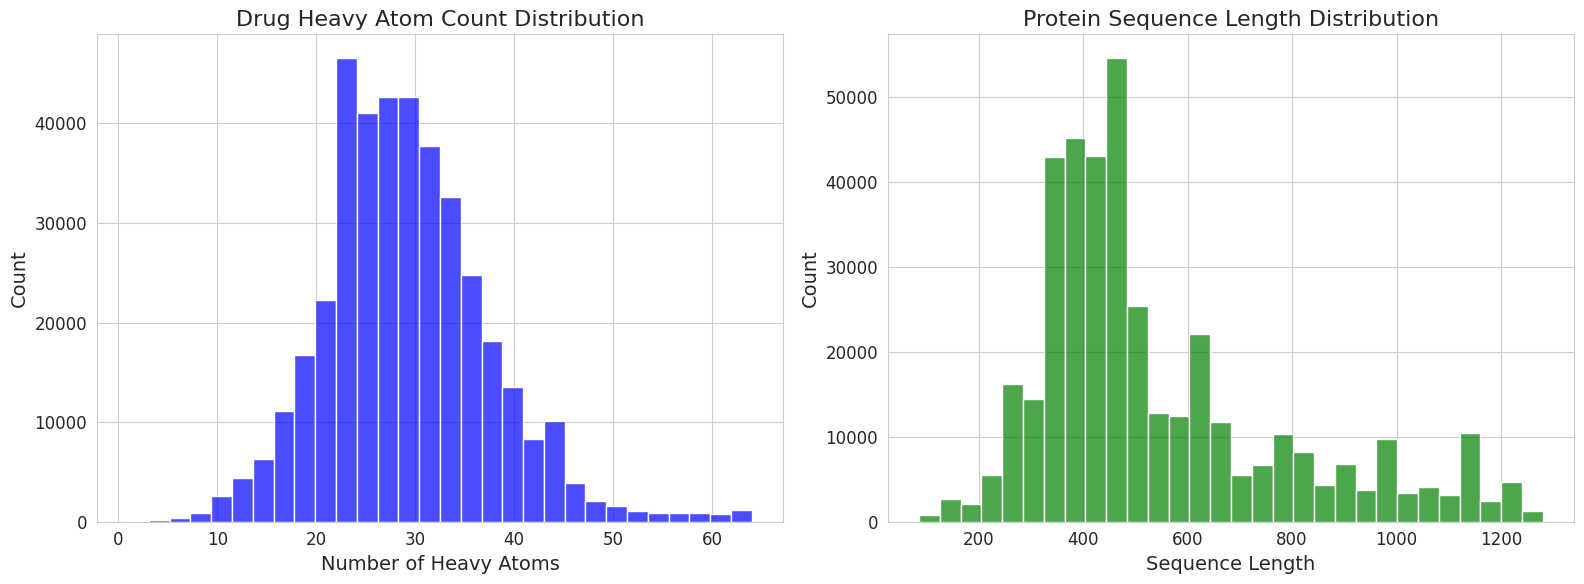

'data/images/dataset_statistics.png'

In [8]:
plot_dataset_statistics(df)

In [9]:
from mb_vae_dti.loading.visualization import plot_interaction_stats

print(plot_interaction_stats(df))

Matrix Coverage: 0.0013 (396,469 observations out of 306,972,214 possible)

Drug Statistics:
  Unique Drugs: 149,962
  Average Observations per Drug: 2.64
  Median Observations per Drug: 1
  Average Positive Interaction Rate: 35.87%
  Median Positive Interaction Rate: 0.00%
  Drugs with Single Observation: 85,352 (56.92%)
  Drugs with Zero Positive Interactions: 81,958 (54.65%)
  Drugs with 100% Positive Interactions: 42,699 (28.47%)

Target Statistics:
  Unique Targets: 2,047
  Average Observations per Target: 193.68
  Median Observations per Target: 23
  Average Positive Interaction Rate: 20.45%
  Median Positive Interaction Rate: 8.51%
  Targets with Single Observation: 267 (13.04%)
  Targets with Zero Positive Interactions: 755 (36.88%)
  Targets with 100% Positive Interactions: 92 (4.49%)



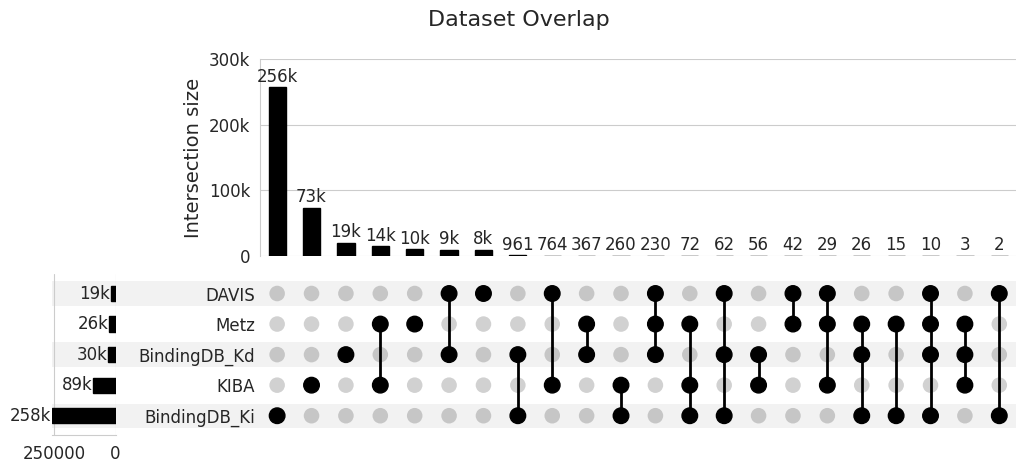

'data/images/dataset_overlap.png'

In [10]:
# This UpSet plot shows
# - the number of unique interactions per dataset
# - the overlap between datasets
plot_dataset_overlap(df)

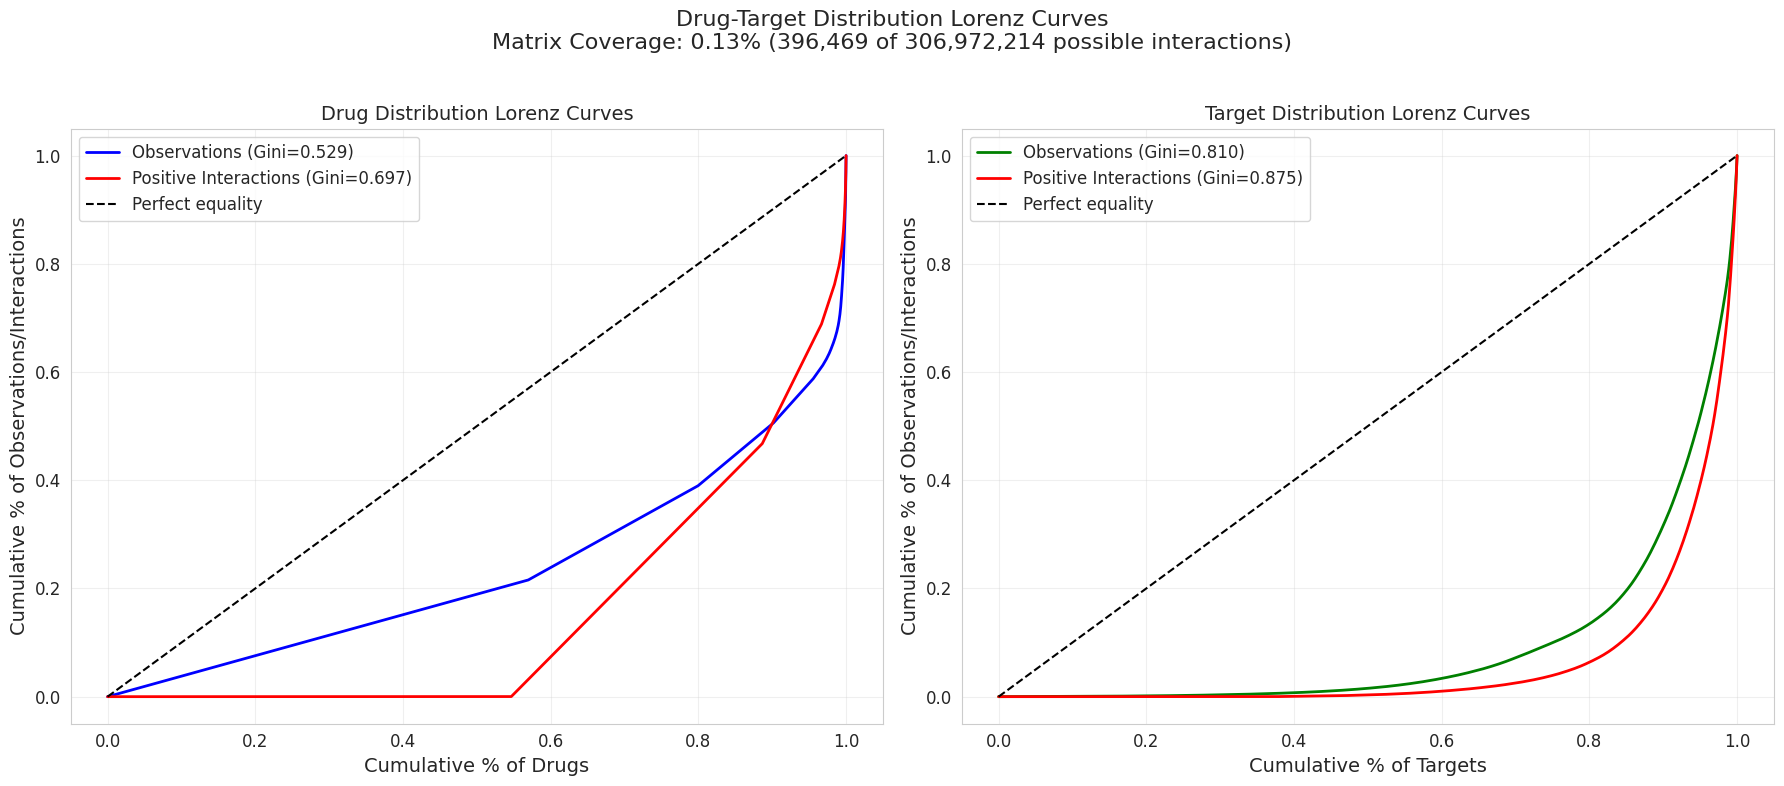

'data/images/lorenz_curves.png'

In [11]:
plot_lorenz_curves(df)

In [12]:
# print unique drugs and targets, interactions, number of possible interactions and ratio
print(f"Unique drugs: {len(df['Drug_SMILES'].unique())}")
print(f"Unique targets: {len(df['Target_AA'].unique())}")
print(f"Interactions: {len(df)}")
print(f"Number of possible interactions: {len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique())}")
print(f"Ratio: {(len(df) / (len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique()))) * 100}%")
df

Unique drugs: 149962
Unique targets: 2047
Interactions: 396469
Number of possible interactions: 306972214
Ratio: 0.12915468629352883%


,Drug_ID,Drug_InChIKey,Drug_SMILES,Target_ID,Target_UniProt_ID,Target_Gene_name,Target_RefSeq_ID,Target_AA,Target_DNA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA
0,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000001,Q2M2I8,AAK1,NM_014911,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,ATGAAGAAGTTTTTCGACTCCCGGCGAGAGCAGGGCGGCTCTGGCC...,False,4.999996,NaN,NaN,True,True,False,False,False
1,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000002,P00519,ABL1,NM_005157,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,AACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACA...,True,8.920819,NaN,NaN,True,False,False,False,False
3,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000003,Q04771,ACVR1,NM_001105,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,ATGGTAGATGGAGTGATGATTCTTCCTGTGCTTATCATGATTGCTC...,False,4.999996,NaN,NaN,True,True,False,False,False
4,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000004,P36896,ACVR1B,NM_004302,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,ATGGCGGAGTCGGCCGGAGCCTCCTCCTTCTTCCCCCTTGTTGTCC...,False,4.999996,NaN,NaN,True,True,False,False,False
5,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000005,P27037,ACVR2A,NM_001278579,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTG...,ATGGGAGCTGCTGCAAAGTTGGCGTTTGCCGTCTTTCTTATCTCCT...,False,4.999996,NaN,NaN,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481971,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T001711,P41279,MAP3K8,NM_001244134,MEYMSTGSDNKEEIDLLIKHLNVSDVIDIMENLYASEEPAVYEPSL...,ATGGAGTACATGAGCACTGGAAGTGACAATAAAGAAGAGATTGATT...,True,NaN,NaN,13.70206,False,False,False,False,True
481973,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000031,Q13554,CAMK2B,NM_001220,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,ATGGCCACCACGGTGACCTGCACCCGCTTCACCGACGAGTACCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
481975,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000032,Q13557,CAMK2D,NM_001221,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,ATGGCTTCGACCACAACCTGCACCAGGTTCACGGACGAGTATCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
481976,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000280,Q16539,MAPK14,NM_001315,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,ATGTCTCAGGAGAGGCCCACGTTCTACCGGCAGGAGCTGAACAAGA...,False,NaN,NaN,10.49794,False,False,False,False,True


In [13]:
df.to_csv("data/processed/data.csv", index=False)

In [ ]:
# Columns
# Drug columns: Drug_ID, Drug_InChIKey, Drug_SMILES
# Target columns: Target_ID, Target_UniProt_ID, Target_Gene_name, Target_RefSeq_ID, Target_AA, Target_DNA
# Interaction columns: Y, Y_pKd, Y_pKi, Y_KIBA
# Provenance columns: in_DAVIS, in_BindingDB_Kd, in_BindingDB_Ki, in_Metz, in_KIBA

## Drug Generation datasets

We fetch a large set of SMILES strings from the following datasets: MOSES, ZINC, ChEMBL_V29.
This dataset is used to pretrain the drug generation model (unsupervised).
The drugs for which we have DTI data are removed from the drug generation datasets, 
to avoid information leakage.

In [2]:
import os
import pandas as pd

os.chdir("/home/robsyc/Desktop/thesis/MB-VAE-DTI")
df = pd.read_csv("data/processed/data.csv")
df

,Drug_ID,Drug_InChIKey,Drug_SMILES,Target_ID,Target_UniProt_ID,Target_Gene_name,Target_RefSeq_ID,Target_AA,Target_DNA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA
0,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000001,Q2M2I8,AAK1,NM_014911,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,ATGAAGAAGTTTTTCGACTCCCGGCGAGAGCAGGGCGGCTCTGGCC...,False,4.999996,NaN,NaN,True,True,False,False,False
1,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000002,P00519,ABL1,NM_005157,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,AACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACA...,True,8.920819,NaN,NaN,True,False,False,False,False
2,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000003,Q04771,ACVR1,NM_001105,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,ATGGTAGATGGAGTGATGATTCTTCCTGTGCTTATCATGATTGCTC...,False,4.999996,NaN,NaN,True,True,False,False,False
3,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000004,P36896,ACVR1B,NM_004302,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,ATGGCGGAGTCGGCCGGAGCCTCCTCCTTCTTCCCCCTTGTTGTCC...,False,4.999996,NaN,NaN,True,True,False,False,False
4,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000005,P27037,ACVR2A,NM_001278579,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTG...,ATGGGAGCTGCTGCAAAGTTGGCGTTTGCCGTCTTTCTTATCTCCT...,False,4.999996,NaN,NaN,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396464,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T001711,P41279,MAP3K8,NM_001244134,MEYMSTGSDNKEEIDLLIKHLNVSDVIDIMENLYASEEPAVYEPSL...,ATGGAGTACATGAGCACTGGAAGTGACAATAAAGAAGAGATTGATT...,True,NaN,NaN,13.70206,False,False,False,False,True
396465,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000031,Q13554,CAMK2B,NM_001220,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,ATGGCCACCACGGTGACCTGCACCCGCTTCACCGACGAGTACCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
396466,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000032,Q13557,CAMK2D,NM_001221,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,ATGGCTTCGACCACAACCTGCACCAGGTTCACGGACGAGTATCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
396467,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000280,Q16539,MAPK14,NM_001315,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,ATGTCTCAGGAGAGGCCCACGTTCTACCGGCAGGAGCTGAACAAGA...,False,NaN,NaN,10.49794,False,False,False,False,True


In [ ]:
from mb_vae_dti.loading import load_drug_generation_datasets

df_drug_generation = load_drug_generation_datasets()
df_drug_generation = df_drug_generation[~df_drug_generation['Drug_SMILES'].isin(df['Drug_SMILES'])]
print(f"Number of unique drugs in drug generation dataset: {len(df_drug_generation['Drug_SMILES'].unique())}")
df_drug_generation.to_csv("data/processed/data_drug_generation.csv", index=False)

In [5]:
df_drug_generation = df_drug_generation[~df_drug_generation['smiles'].isin(df['Drug_SMILES'])]
print(f"Number of unique drugs in drug generation dataset: {len(df_drug_generation['smiles'].unique())}")
df_drug_generation.to_csv("data/processed/data_drug_generation.csv", index=False)
df_drug_generation # 4,130,685 -> 4,007,090

Number of unique drugs in drug generation dataset: 4007090


,smiles
0,Cc1cccc(N2CC(c3nc4ccccc4n3C)CC2=O)c1C
1,CCn1c(C2CC(=O)N(c3cccc(C)c3C)C2)nc2ccccc21
2,Cc1cc(C)c(N2CC(c3nc4ccccc4[nH]3)CC2=O)c(C)c1
3,Cc1cc(C)c(N2CC(c3nc4ccccc4n3C)CC2=O)c(C)c1
4,Cn1c(C2CC(=O)N(Cc3ccccc3)C2)nc2ccccc21
...,...
4271135,Fc1cccc(CNc2nc(Oc3c(F)c(F)c(F)c(F)c3F)nc(N3CCO...
4271136,OC12CC3CC(C1)CC(NCc1cnc(Br)s1)(C3)C2
4271137,CCCCCCCCCCC/C(=N\O)c1cc(-c2ccc(OC)c(F)c2)ccc1O
4271138,Clc1cccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)c1
